In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
# !pip install keras-tuner --upgrade

# import keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation


In [109]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('/content/drive/MyDrive/FYP/punjabi_completewords.csv')

# Drop rows with NaN values
df.dropna(subset=['Word', 'Lemma'], inplace=True)

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2,
                                       random_state=42)
print(len(train_set), len(test_set))

[('نہاوندیاں', 'نہا'), ('نہاندیاں', 'نہا'), ('نہا', 'نہا'), ('نہائیں', 'نہا'), ('نہاویں', 'نہا'), ('نہاوٗ', 'نہا'), ('نہایو', 'نہا'), ('نہاویو', 'نہا'), ('نہایا', 'نہا'), ('نہاویا', 'نہا'), ('نہاواں', 'نہا'), ('نہائیے', 'نہا'), ('نہاوئیے', 'نہا'), ('نہادا', 'نہا'), ('نہادی', 'نہا'), ('نہادے', 'نہا'), ('نہادیاں', 'نہا'), ('نہایں', 'نہا'), ('نہاو', 'نہا'), ('نہاوے', 'نہا'), ('نہائے', 'نہا'), ('نہاون', 'نہا'), ('نہان', 'نہا'), ('ابل', 'ابل'), ('ابلنا', 'ابل'), ('ابلنی', 'ابل'), ('ابلنے', 'ابل'), ('ابلیاں', 'ابل'), ('ابلدا', 'ابل'), ('ابلدی', 'ابل'), ('ابلدے', 'ابل'), ('ابلدیاں', 'ابل'), ('ابلئیں', 'ابل'), ('ابلیں', 'ابل'), ('ابلوٗ', 'ابل'), ('ابلیو', 'ابل'), ('ابلیا', 'ابل'), ('ابلاں', 'ابل'), ('ابلئیے', 'ابل'), ('ابلواں', 'ابل'), ('ابلویں', 'ابل'), ('ابلو', 'ابل'), ('ابلویو', 'ابل'), ('ابلویا', 'ابل'), ('ابلوے', 'ابل'), ('ابلئے', 'ابل'), ('ابلون', 'ابل'), ('ابلن', 'ابل'), ('جھک', 'جھک'), ('جھکنا', 'جھک'), ('جھکنی', 'جھک'), ('جھکنے', 'جھک'), ('جھکیاں', 'جھک'), ('جھکدا', 'جھک'), ('جھکندی',

In [110]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

In [111]:
print(words)

['رانیاں', 'وِچھاوئیے', 'گوانڈیاں', 'جرمانیاں', 'مچوانے', 'چوواون', 'تپاوندی', 'چپٹا', 'خرچئے', 'پِٹواون', 'مسکراوندہیں', 'تجارتیئیاں', 'جوردارنا', 'دیکھاوٗ', 'ترئیے', 'مورکھویو', 'لوٹواندیاں', 'چھکویا', 'صاف-ستھراوے', 'پگھلواندی', 'فاسٹن', 'چڑایو', 'پلٹویا', 'بیجواں', 'آسڑیلویندی', 'گھمواوندا', 'ڈُلاواں', 'متھاو', 'ہاسیو ', 'چبنا', 'دوستانہئے', 'مغربیئیں', 'تگڑاوندیاں', 'چُھپنے', 'بھیجاوئیے', 'مامی', 'لنگھوانا', 'تھاپڑیو', 'ٹوکیا', 'ہر', 'چٹدے', 'نبھویا', 'ڈرا', 'بھجواوندا', 'حجمو', 'چھڈویں', 'سجھانی', 'پتنی', 'تنہاو', 'وناوے', 'آکھواوندی', 'اوکھا', 'چستیا', 'پھسلان', 'جوردار', 'میلوایا', 'خوبصورتنی', 'کنڈی', 'تولواویا', 'مہکوادیاں', 'ٹانڈے', 'ہیکرو', 'گھٹوان', 'شمارہ', 'ٹھاکنا', 'بھیجواون', 'لیکوادے', 'عقلمنددا', 'چرویں', 'ویندی', 'وصولیاں', 'پُگویا', 'راضیندا', 'پِددے', 'پاڑوان', 'سوہنی', 'کوڑا', 'بہتویا', 'بی بیو', 'تجارتیئے', 'الٹواویو', 'اپڑاویں', 'بدماش', 'باداماں', 'میٹواویا', 'بیتاون', 'چھنوایا', 'سوٹاو', 'گونجنا', 'صاف-ستھرانا', 'پاو', 'لگاوے', 'سوترواویا', 'اجیبون', 'گابرایا

In [112]:
print(lemmas)

['رانی', 'وِچھا', 'گوانڈی', 'جرمانہ', 'مچوا', 'چووا', 'تپا', 'چپٹا', 'خرچ', 'پِٹوا', 'مسکراوندہ', 'تجارتی', 'جوردار', 'دیکھا', 'تر', 'مورکھ', 'لوٹوا', 'چھک', 'صاف-ستھرا', 'پگھلوا', 'فاسٹ', 'چڑا', 'پلٹ', 'بیج', 'آسڑیلوی', 'گھموا', 'ڈُلا', 'متھا', 'ہاسہ', 'چب', 'دوستانہ', 'مغربی', 'تگڑا', 'چُھپ', 'بھیجا', 'مامی', 'لنگھوا', 'تھاپڑی', 'ٹوک', 'ہر', 'چٹ', 'نبھ', 'ڈرا', 'بھجوا', 'حجم', 'چھڈ', 'سجھا', 'پتنی', 'تنہا', 'ونا', 'آکھوا', 'اوکھا', 'چست', 'پھسلا', 'جوردار', 'میلوا', 'خوبصورت', 'کنڈی', 'تولوا', 'مہکوا', 'ٹانڈا', 'ہیکر', 'گھٹوا', 'شمارہ', 'ٹھاک', 'بھیجوا', 'لیکوا', 'عقلمند', 'چر', 'ویندی', 'وصولی', 'پُگ', 'راضی', 'پِد', 'پاڑوا', 'سوہنی', 'کوڑ', 'بہت', 'بی بی', 'تجارتی', 'الٹوا', 'اپڑا', 'بدماش', 'بادام', 'میٹوا', 'بیتا', 'چھنوا', 'سوٹا', 'گونج', 'صاف-ستھرا', 'پا', 'لگا', 'سوتروا', 'اجیب', 'گابرا', 'جھولا', 'ٹونڈا', 'نکل', 'ڈٹھا', 'خزانہ', 'بادشاہت', 'جتا', 'اہلکار', 'تلکوا', 'گابروا', 'کھلرا', 'ڈر', 'خطرنا ک', 'امریکی', 'منوا', 'سنتری', 'اُساری', 'مک', 'سدوا', 'مکوا', 'جھلوا', 'چُن', '

In [113]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# Replace 'df' with your DataFrame name if it's different

def check_float_in_dataset(df):
    # Check 'Lemma' column for floats
    lemma_floats = any(isinstance(value, float) for value in df['Lemma'])

    # Check 'Word' column for floats
    word_floats = any(isinstance(value, float) for value in df['Word'])

    return lemma_floats or word_floats

# Usage example:
# If your DataFrame is named 'dataset', you can call the function like this:
result = check_float_in_dataset(df)
print(result)  # This will print True if there are floats, False otherwise


False


In [114]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)

In [115]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 58


In [116]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'د': 5,
 'ں': 6,
 'ھ': 7,
 'ر': 8,
 'ے': 9,
 'ک': 10,
 'ل': 11,
 'م': 12,
 'س': 13,
 'ب': 14,
 'پ': 15,
 'ت': 16,
 'ٹ': 17,
 'ئ': 18,
 'گ': 19,
 'چ': 20,
 'ج': 21,
 'ڑ': 22,
 'ہ': 23,
 'ڈ': 24,
 'ُ': 25,
 'ف': 26,
 ' ': 27,
 'ش': 28,
 'ٗ': 29,
 'ِ': 30,
 'ق': 31,
 'ز': 32,
 'ح': 33,
 'ع': 34,
 'خ': 35,
 'َ': 36,
 'ص': 37,
 'آ': 38,
 'ط': 39,
 'ض': 40,
 'غ': 41,
 'ذ': 42,
 'ث': 43,
 '-': 44,
 'ظ': 45,
 'ٰ': 46,
 '/': 47,
 'ٔ': 48,
 'ّ': 49,
 'ؔ': 50,
 's': 51,
 'u': 52,
 'r': 53,
 'f': 54,
 'a': 55,
 'c': 56,
 'e': 57}

In [118]:
tokenizer.fit_on_texts(lemmas)
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [119]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['رانیاں', 'وِچھاوئیے', 'گوانڈیاں', 'جرمانیاں', 'مچوانے']
[[6, 1, 4, 3, 1, 20], [2, 28, 18, 5, 1, 2, 25, 3, 22], [17, 2, 1, 4, 23, 3, 1, 20], [19, 6, 10, 1, 4, 3, 1, 20], [10, 18, 2, 1, 4, 22]]
['رانی', 'وِچھا', 'گوانڈی', 'جرمانہ', 'مچوا']
[[6, 1, 4, 3], [2, 28, 18, 5, 1], [17, 2, 1, 4, 23, 3], [19, 6, 10, 1, 4, 16], [10, 18, 2, 1]]


اسلام آبادیوندیاں


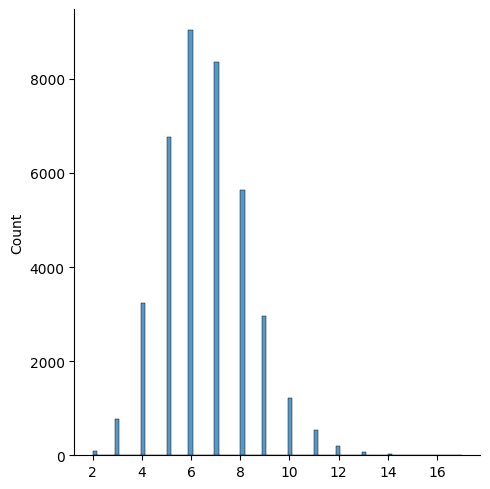

In [120]:
import seaborn as sns
import numpy as np

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [121]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 17


In [124]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[ 6,  1,  4,  3,  1, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 2, 28, 18,  5,  1,  2, 25,  3, 22,  0,  0,  0,  0,  0,  0,  0,
         0],
       [17,  2,  1,  4, 23,  3,  1, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [19,  6, 10,  1,  4,  3,  1, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10, 18,  2,  1,  4, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18,  2,  2,  1,  2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [14, 13,  1,  2,  4,  9,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18, 13, 15,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [34,  6, 18, 25, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [13, 28, 15,  2,  1,  2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [125]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[ 6,  1,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 2, 28, 18,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [17,  2,  1,  4, 23,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [19,  6, 10,  1,  4, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10, 18,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [14, 13,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18, 13, 15,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [34,  6, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [13, 28, 15,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [126]:
## training data
X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')


# ## testing data
# X_test_texts = [n for (n, l) in test_set]
# Y_test_texts = [l for (n, l) in test_set]
# X_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')
# y_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')

In [127]:
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(38909, 17)
(38909, 17)


In [128]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(38909, 60)


In [129]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(38909, 60)


In [95]:
# print(X_test)

In [130]:
print(test_set)

[('ڈھگائیں', 'ڈھگا'), ('گیڑواندا', 'گیڑوا'), ('اُبھرواون', 'اُبھروا'), ('شماریاں', 'شمارہ'), ('فلپائنیئے', 'فلپائنی'), ('فاسڑون', 'فاسڑ'), ('چھلایں', 'چھلا'), ('شانتوے', 'شانت'), ('پڑھاکو', 'پڑھاکو'), ('چوسوا', 'چوسوا'), ('اکھیرئیے', 'اکھیر'), ('کڈادے', 'کڈا'), ('لکھایو', 'لکھا'), ('اُساریے', 'اُساری'), ('اچانکیا', 'اچانک'), ('ہدایتکارو', 'ہدایتکار'), ('اٹکائیے', 'اٹکا'), ('دِسواویں', 'دِسوا'), ('کنوارا', 'کنوار'), ('جگائیں', 'جگا'), ('کٹایں', 'کٹا'), ('چُھپوادے', 'چُھپوا'), ('موسمییا', 'موسمی'), ('پُھلایں', 'پُھلا'), ('بُھلایو', 'بُھلا'), ('نساں', 'نس'), ('ڈیگایا', 'ڈیگا'), ('اسمباوہدیاں', 'اسمباوہ'), ('قابلاں', 'قابل'), ('رڑھیاں', 'رڑھ'), ('ڈراونہیو', 'ڈراونہ'), ('عبد', 'عبد'), ('دھاڑنی', 'دھاڑ'), ('اندھیے', 'اندھی'), ('کھلراویا', 'کھلرا'), ('گابردی', 'گابر'), ('پُجواو', 'پُجوا'), ('پچاندی', 'پچا'), ('تگڑادا', 'تگڑا'), ('مالینی', 'مالی'), ('سہیلیاں', 'سہیلی'), ('پھڑیچواوے', 'پھڑیچوا'), ('رُساوندی', 'رُسا'), ('زندیا', 'زندہ'), ('نہاویں', 'نہا'), ('کترواواں', 'کتروا'), ('کجئیں', 'کج'),

In [131]:
print(words[2])
print(words_matrix[2,:])

گوانڈیاں
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
print(lemmas[2])
print(lemmas_matrix[2,:])

گوانڈی
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [134]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(LSTM(units=64, return_sequences=True))  # Ensure LSTM outputs sequences
model.add(TimeDistributed(Dense(56, activation='softmax')))  # TimeDistributed for sequence prediction

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [135]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
304/304 [==============================] - 5s 11ms/step - loss: 1.1612 - accuracy: 0.7513
Epoch 2/10
304/304 [==============================] - 2s 6ms/step - loss: 0.4598 - accuracy: 0.8871
Epoch 3/10
304/304 [==============================] - 2s 5ms/step - loss: 0.1298 - accuracy: 0.9659
Epoch 4/10
304/304 [==============================] - 2s 5ms/step - loss: 0.0838 - accuracy: 0.9757
Epoch 5/10
304/304 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9793
Epoch 6/10
304/304 [==============================] - 2s 5ms/step - loss: 0.0563 - accuracy: 0.9813
Epoch 7/10
304/304 [==============================] - 2s 5ms/step - loss: 0.0509 - accuracy: 0.9827
Epoch 8/10
304/304 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9840
Epoch 9/10
304/304 [==============================] - 2s 6ms/step - loss: 0.0439 - accuracy: 0.9850
Epoch 10/10
304/304 [==============================] - 2s 5ms/step - loss: 0.0410 - accuracy: 0.985

In [136]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('my_model.keras')

# Print a success message
print("Model saved successfully as 'my_model.keras'")

Model saved successfully as 'my_model.keras'


In [137]:
from keras.models import load_model
def predict_lemma(word, tokenizer, max_len):
  # Convert the word to a sequence of integers
  sequence = tokenizer.texts_to_sequences([word])

  # Pad the sequence to the maximum length
  padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

  # Predict the lemma using the trained model
  predictions = model.predict(padded_sequence)

  # Convert the prediction to the corresponding lemma
  # Since the output is a sequence, we need to take the argmax for each timestep
  lemma_sequence = np.argmax(predictions, axis=-1)[0]

  # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
  lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

  return lemma

In [138]:
# Example usage (Actuall lemma = ڈھگا):
word = 'ڈھگائیں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 560ms/step
The predicted lemma for ڈھگائیں is: ڈھگا


In [140]:
# Example usage (Actuall lemma = ڈراونہ):
word = 'ڈراونہیو'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 17ms/step
The predicted lemma for ڈراونہیو is: ڈراہ


In [141]:
# Example usage (Actuall lemma = 'تگڑا'):
word = 'تگڑادا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 18ms/step
The predicted lemma for تگڑادا is: تگڑا


In [142]:
# Example usage (Actuall lemma = 'ودا'):
word = 'وداندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 17ms/step
The predicted lemma for وداندیاں is: ودا


In [144]:
# Example usage (Actuall lemma = 'چھڈوا'):
word = 'چھڈواوئیے'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 19ms/step
The predicted lemma for چھڈواوئیے is: چھڈوا


In [ ]:
# Example usage (Actuall lemma = چوندهيا):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 33ms/step
The predicted lemma for چوندهيانا is: چوندهيا


In [145]:
# Example usage (Actuall lemma = 'مچوا'):
word = 'مچواندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 18ms/step
The predicted lemma for مچواندیاں is: مچوا


In [146]:
# Example usage (Actuall lemma ='جھپٹوا'):
word = 'جھپٹواوندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 17ms/step
The predicted lemma for جھپٹواوندیاں is: جھپٹوا


In [147]:
# Example usage (Actuall lemma ='اُگال''):
word = 'اُگالن'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 18ms/step
The predicted lemma for اُگالن is: اُگال


In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing import sequence
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation

# Read data from CSV file (assuming 'word' and 'lemma' columns)
# df = pd.read_csv('/content/drive/MyDrive/FYP/punjabi_completewords.csv')

# Print the size of the dataset before removing NaN values
# print("Size of dataset before removing NaN values:", df.shape)

# nan_rows = df[df['Word'].isnull() | df['Lemma'].isnull()]
# print("\nRows containing NaN values in 'Word' or 'Lemma' columns:")
# print(nan_rows)

# Drop rows with NaN values
# df.dropna(subset=['Word', 'Lemma'], inplace=True)

# Print the size of the dataset after removing NaN values
# print("\nSize of dataset after removing NaN values:", df.shape)

# word_to_lemma = list(zip(df['Word'], df['Lemma']))

# print(word_to_lemma)

# train_set, test_set = train_test_split(word_to_lemma,
#                                        test_size=0.2,
#                                        random_state=42)
# print(len(train_set), len(test_set))

# words = [n for (n, l) in train_set] ## X
# lemmas = [l for (n, l) in train_set] ## y
# print(words)
# print(lemmas)

# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(words)
# # determine the vocabulary size
# vocab_size = len(tokenizer.word_index) + 1
# print('Vocabulary Size: %d' % vocab_size)
# tokenizer.word_index

# tokenizer.fit_on_texts(lemmas)
# words_ints = tokenizer.texts_to_sequences(words)
# lemmas_ints = tokenizer.texts_to_sequences(lemmas)

# print(words[:5])
# print(words_ints[:5])
# print(lemmas[:5])
# print(lemmas_ints[:5])

# import seaborn as sns
# import numpy as np

# ## We can check the length distribution of texts in corpus

# words_lens = [len(n) for n in words_ints]
# words_lens

# sns.displot(words_lens)
# print(words[np.argmax(words_lens)])  # longest name
# max_len = words_lens[np.argmax(words_lens)]
# max_len

# words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
# words_ints_pad[:10]
# lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
# lemmas_ints_pad[:10]

# ## training data
# X_train = np.array(words_ints_pad).astype('int32')
# y_train = np.array(lemmas_ints_pad).astype('int32')


# ## testing data
# X_test_texts = [n for (n, l) in test_set]
# Y_test_texts = [l for (n, l) in test_set]
# X_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')
# y_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
# print(words_matrix.shape)
# lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
# print(lemmas_matrix.shape)

# print(words[2])
# print(words_matrix[2,:])
# print(lemmas[2])
# print(lemmas_matrix[2,:])

# # Define the model
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
# model.add(LSTM(units=64, return_sequences=True))  # Ensure LSTM outputs sequences
# model.add(TimeDistributed(Dense(56, activation='softmax')))  # TimeDistributed for sequence prediction

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=128)

# from keras.models import load_model

# # Assuming 'model' is your trained model
# # Save the model to a file
# model.save('model.h5')

# # Print a success message
# print("Model saved successfully as 'model.h5'")

# def predict_lemma(word, tokenizer, max_len):
#     # Convert the word to a sequence of integers
#     sequence = tokenizer.texts_to_sequences([word])

#     # Pad the sequence to the maximum length
#     padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

#     # Predict the lemma using the trained model
#     prediction = model.predict(padded_sequence)

#     # Convert the prediction to the corresponding lemma
#     # Since the output is a sequence, we need to take the argmax for each timestep
#     lemma_sequence = np.argmax(prediction, axis=-1)[0]

#     # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
#     lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

#     return lemma

# word = 'کهيوٹو'
# predicted_lemma = predict_lemma(word, tokenizer, max_len)
# print(f"The predicted lemma for {word} is: {predicted_lemma}")